
<H1 style=text-align:center;>Projet de Licence en Informatique parcours Math-INFO</H1>
<h1 style=text-align:center;>Enseignante : Raquel URENA</h3>

<h2 style=text-align:center;>Sujet choisi: </h3>
<h2 style=text-align:center;>Réseaux Bayésiens pour la Décision Clinique Interprétable</h3>

<h2 style=text-align:center;>Membres du groupe par ordre alphabétique:</h3>
<h2 style=text-align:center;>Joséphine HERMANS, Hiromi SUIDO, Michael TEIXEIRA </h3>

# Plan de développement

# Gestion de configuration
L'équipe utilise github pour gérer la configuration du projet. Le repository github possède une branch nommée 'main'. 
- Lorsqu'un membre de l'équipe developpe une nouvelle fonctionalité, celle-ci doit être developpée dans une branche.
- lorsque le développement de la fonctionnalité est terminée, le membre d'équipe crée une merge request dans github
- la merge request est revue par un membre de l'équipe.
- si la fonctionnalité est bonne, la branche peut être mergée avec la branche 'main'.

## Libarie python utilisée

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np

## Outils utilisés

- Notebook jupyter: pour le rapport et le code
- Python 3: language utilisé pour développer le programme et le notebook
- Drawio: Pour créer les schémas
- ...

# Vérification du code
La vérification du code est faite par une vérication du guide PEP8. Le code est aussi vérifié par revue du code par un membre de l'équipe avant merge dans la branche master du code sur github

In [ ]:
%pip install pycodestyle pycodestyle_magic
%load_ext pycodestyle_magic

# Validation
- La validation du code doit passer par des tests unitaires dont le nom de fonction commence par "test_".
- ...

## Planning
Voici le planning suivi par notre projet:

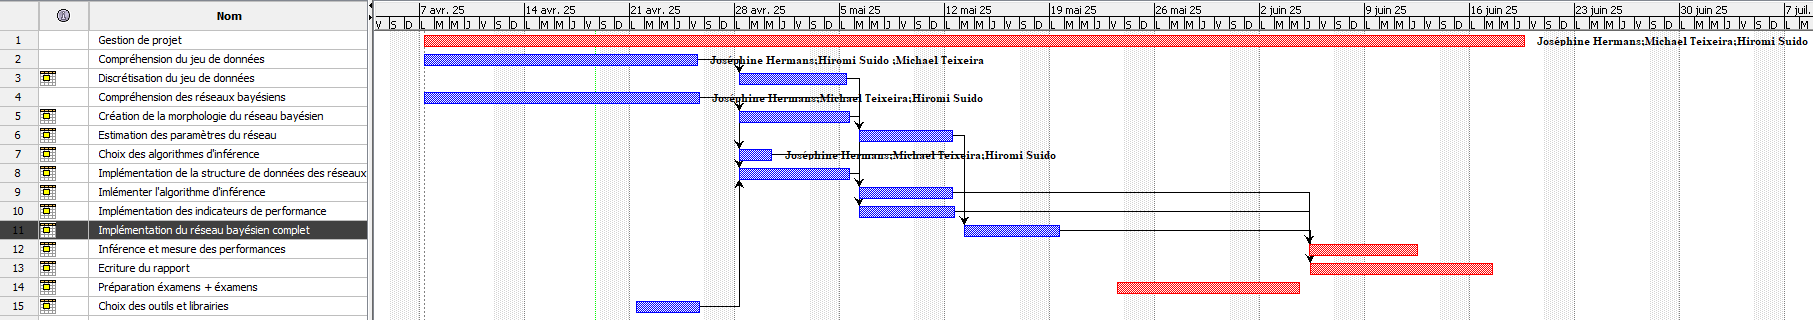

In [3]:
Image("gestion_de_projet/planning_gantt_20250418.png")

Le développement suit un modèle V tel que vu ci-dessous

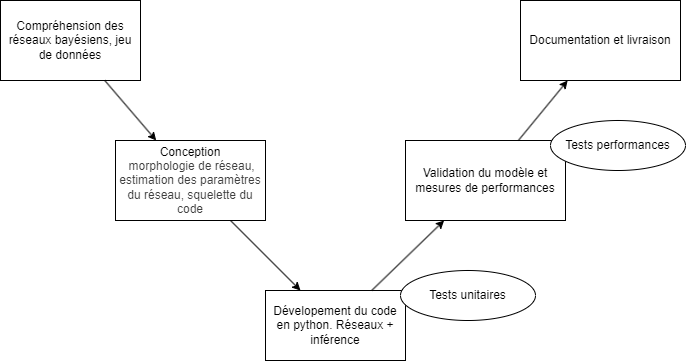

In [5]:
Image("gestion_de_projet/dev_plan.png")

# Préparation des données

In [ ]:
df = pd.read_csv("ressources/diabetes.csv")
print(df)

#replace erroneous data by NaN.
df.loc[df.Insulin == 0, 'Insulin'] = np.nan
df.loc[df.Glucose == 0, 'Glucose'] = np.nan
df.loc[df.BloodPressure == 0, 'BloodPressure'] = np.nan
df.loc[df.SkinThickness == 0, 'SkinThickness'] = np.nan
df.loc[df.BMI == 0, 'BMI'] = np.nan

correl = df.corr(min_periods=3)
correl


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


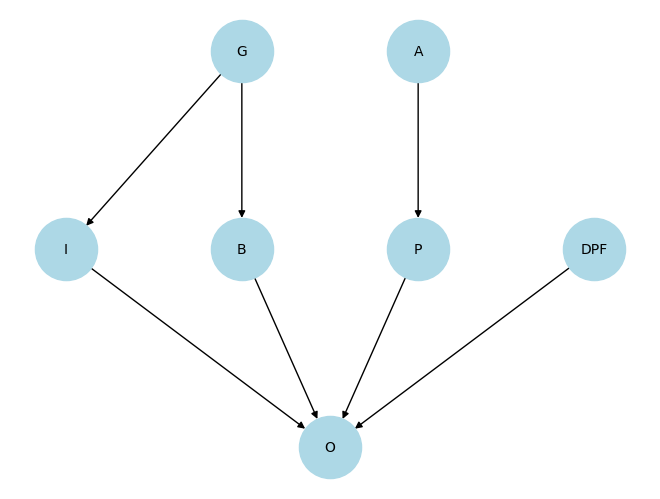

In [ ]:
#graphviz test
import networkx as nx

g = nx.DiGraph()
g.add_node('A', label='Age', layer=3)
g.add_node('G', label='Glucose', layer=3)
g.add_node('I', label='Insulin', layer=2)
g.add_node('B', label='BMI', layer=2)
g.add_node('O', label='Outcome', layer=1)
g.add_node('P', label='Pregnancies', layer=2)
g.add_node('DPF', label='DiabetesPedigreeFunction', layer=2)

g.add_edge('A', 'P')
g.add_edge('G', 'I')
g.add_edge('I', 'O')
g.add_edge('G', 'B')
g.add_edge('B', 'O')
g.add_edge('P', 'O')
g.add_edge('DPF', 'O')

pos = nx.multipartite_layout(g, subset_key="layer", align="horizontal") 
nx.draw(g, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrows=True)
    

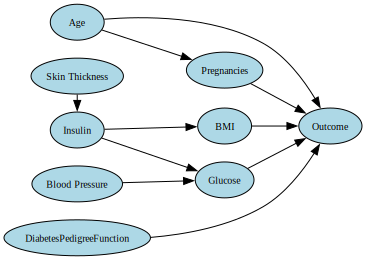

In [22]:
from graphviz import Digraph

dot = Digraph(comment='Réseau bayésien diabetes')
dot.attr(rankdir='LR') 
dot.attr('node', shape='ellipse', style='filled', fillcolor='lightblue', fontsize='10')

# ajout des noeuds existants
dot.node('A', 'Age')
dot.node('G', 'Glucose')
dot.node('I', 'Insulin')
dot.node('B', 'BMI')
dot.node('O', 'Outcome')
dot.node('P', 'Pregnancies')
dot.node('DPF', 'DiabetesPedigreeFunction')

# ajout des nouveaux noeuds
dot.node('BP', 'Blood Pressure')
dot.node('ST', 'Skin Thickness')

# définition de layer pour mieux afficher
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('G')
    s.node('B')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('I')
    s.node('DPF')
    s.node('ST')  
    s.node('A')
    s.node('BP')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('O')

# ajout des arcs
dot.edges([
    ('A', 'P'),
    ('I', 'G'),
    ('G', 'O'),
    ('I', 'B'),
    ('B', 'O'),
    ('P', 'O'),
    ('DPF', 'O'),
    ('BP', 'G'), 
    ('ST', 'I'), 
    ('A', 'O'), 
])

display(dot)